# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)=\sigma(\mathbf w^T \mathbf x)=\frac{1}{1+e^{-\mathbf w^T \mathbf x}}$$ 

$$p(y=0| \mathbf{x}, \mathbf w)=1-\sigma(\mathbf w^T \mathbf x)=1-\frac{1}{1+e^{-\mathbf w^T \mathbf x}}$$ 



### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





 $$p(y=1)=p(y=0)\\\frac{1}{1+e^{-\mathbf w^T \mathbf x}}=1-\frac{1}{1+e^{-\mathbf w^T \mathbf x}}\\\frac{2}{1+e^{-\mathbf w^T \mathbf x}}=1\\e^{-\mathbf w^T \mathbf x}=1\\decision\ boundary:\mathbf w^T \mathbf x=0$$



### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



$$P(y^i=1)=\sigma(\mathbf w^T \mathbf x^i)^{y^i}(1-\sigma(\mathbf w^T \mathbf x^i))^{1-y^i}\\L_{CE}=log( \prod_{i=1}^N \sigma(\mathbf w^T \mathbf x^i)^{y^i}(1-\sigma(\mathbf w^T \mathbf x^i))^{1-y^i})\\=\sum_{i=1}^{N}log(\sigma(\mathbf w^T \mathbf x^i)^{y^i}(1-\sigma(\mathbf w^T \mathbf x^i))^{1-y^i})\\=\sum_{i=1}^{N} y^i log\sigma(\mathbf w^T \mathbf x^i)+(1-y^i)log(1-\sigma(\mathbf w^T \mathbf x^i))$$


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$$ \nabla_{\mathbf w_j} L_{CE} = \frac{\partial L_{CE}}{\partial w_j}=\frac{\partial{\sum_{i=1}^{N} y^i log\sigma(\mathbf w^T \mathbf x^i)+(1-y^i)log(1-\sigma(\mathbf w^T \mathbf x^i))} }{\partial w_j}\\=\sum_{i=1}^{N} (y^i\frac{1}{\sigma(\mathbf w^T \mathbf x^i)}-(1-y^i)\frac{1}{1-\sigma(\mathbf w^T \mathbf x^i)})\frac{\partial \sigma(\mathbf w^T \mathbf x^i)}{w_j}\\=\sum_{i=1}^{N} (y^i\frac{1}{\sigma(\mathbf w^T \mathbf x^i)}-(1-y^i)\frac{1}{1-\sigma(\mathbf w^T \mathbf x^i)})\sigma(\mathbf w^T \mathbf x^i)(1-\sigma(\mathbf w^T \mathbf x^i))\frac{\partial \mathbf w^T \mathbf x^i}{w_j}\\=\sum_{i=1}^{N}(y^i(1-\sigma(\mathbf w^T \mathbf x^i))-(1-y^i)\sigma(\mathbf w^T \mathbf x^i))x_j^i\\=\sum_{i=1}^{N}(y^i-\sigma(\mathbf w^T \mathbf x^i))x_j^i\\\therefore\nabla_\mathbf w L_{CE}=\sum_{i=1}^{N}(y^i-\sigma(\mathbf w^T \mathbf x^i))x^i=X^T(\mathbf y-\sigma(X\mathbf w))$$

### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



The accuracy of Logistic Regression will approach 1. The model will have low sensitivvity and high specificity. However, in practice, this model is not useful, it cannot predict the minority class.


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



[[-0.09063453]
 [ 0.21964175]
 [-0.56726875]
 [ 0.20212435]
 [ 0.35096291]]


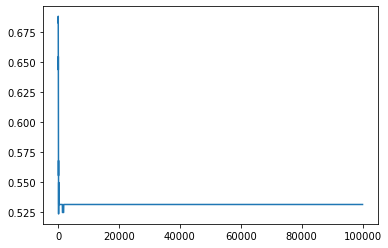

In [57]:
# write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import math

data=pd.read_csv("CBC_data.csv").dropna()
n=data.shape[0]

# clean y
y=np.array(data['PARASITE_STATUS']).reshape((n,1))
y[y=='Negative']=0
y[y=='Positive']=1

# pick features for x
age=np.array(data['AGE']).reshape((n,1))
RBC=np.array(data['RBC']).reshape((n,1))
HGB=np.array(data['HGB']).reshape((n,1))
WBC=np.array(data['WBC']).reshape((n,1))
X=np.hstack((age,RBC,HGB,WBC))
scale=StandardScaler() 
X_scaled = scale.fit_transform(X)
X=np.hstack((np.ones((n,1)),X_scaled))
# print(X)

# under-sampling
X_new=np.array([])
y_new=np.array([])
X_pick=np.array([])
y_pick=np.array([])
count=0
count_1=0
for i in range(y.shape[0]):
    if y[i,0]==1:
        X_new=np.append(X_new,X[i,:])
        y_new=np.append(y_new, [1])
#         print(X[i,:])
        count+=1
    else:
        X_pick=np.append(X_pick,X[i,:])
        y_pick=np.append(y_pick, [0])
        count_1+=1
y_new=y_new.reshape((count,1))
X_new=X_new.reshape((count,5))
y_pick=y_pick.reshape((count_1,1))
X_pick=X_pick.reshape((count_1,5))
np.random.shuffle(X_pick)
temp_X=X_pick[:count,:]
temp_y=y_pick[:count,:]
X=np.vstack((X_new,temp_X))
y=np.vstack((y_new,temp_y))
# print(X.shape,y.shape)
temp=np.hstack((X,y))
# print(temp.shape)
np.random.shuffle(temp)
X=temp[:,:5]
y=temp[:,-1].reshape((X.shape[0],1))


# split train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
train_n=X_train.shape[0]
test_n=X_test.shape[0]


# SGD
w=np.array([1.,.0,.0,.0,.1]).reshape((5,1))
# test=1/w
# print(test)
learning_rate=0.1
num_iters=100000
result=[]
h=0.5

for i in range(num_iters):
#     print(i)
    z=-X_train.dot(w)
    for j in range(z.shape[0]):
        z[j,0]=math.exp(z[j,0])
    sig=1/(1+z)
    dw=(X_train.T).dot(y_train-sig)
    w=w+(learning_rate/train_n)*dw
    
#     calculate f1 score
    
    tp,fp,fn,tn=0,0,0,0
    predict=X_test.dot(w)
    for j in range(predict.shape[0]):
        predict[j,0]=math.exp(-predict[j,0])
        predict[j,0]=1/(1+predict[j,0])
#         print(X_test[j,0])
        if predict[j,0]>=h and y_test[j,0]==1:
            tp+=1
        if predict[j,0]>=h and y_test[j,0]==0:
            fp+=1
        if predict[j,0]<h and y_test[j,0]==1:
            fn+=1
        if predict[j,0]<h and y_test[j,0]==0:
            tn+=1
    r=tp/(tp+fn)
    p=tp/(tp+fp)
    f1=2*(r*p)/(r+p)
    result.append(f1)
#     print(predict)
#     print(tp,fn,fp)
#     print(predict.shape)
print(w)
# print(result)
plt.plot(result)
plt.show()